In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import StationV6 as Station
import Prices

In [3]:
station1 = Station.Station()

In [6]:
dispenser_time_demand = []
starting_storage_level = 0
electrolyser_capacity = 22.125*1
storage_capacity = 9.5*4

arrival_time_cost = np.zeros(48)
for i in range(4,48):
    print(i)
    dispenser_time_demand = [i]
    '''
    Yearly simulation
    '''
    daily_refill_avg = np.zeros(365)
    for n in range(365):

        day = n+1

        elec_price = Prices.elec_prices_data(day)

        demand, level, unsatisfied = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level,electrolyser_capacity,storage_capacity)

        if unsatisfied > 0:
            print('Unsatisfied')

        elec_demand = demand * 51.38 # kWh

        refill_cost = np.dot(elec_demand, elec_price/100)

        avg_refill_cost = refill_cost/len(dispenser_time_demand)

        daily_refill_avg[n] = avg_refill_cost
        
    arrival_time_cost[i] = np.average(daily_refill_avg)


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47


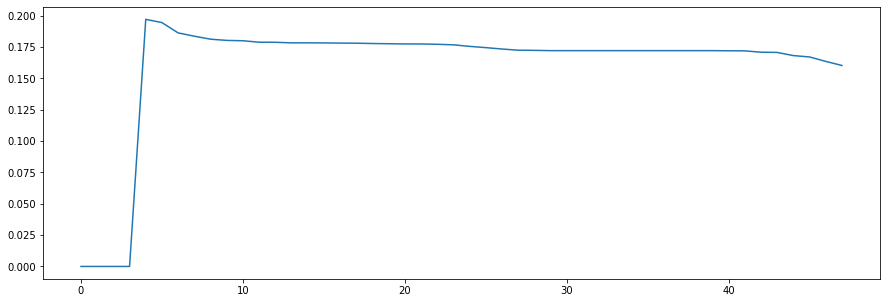

In [8]:
fig, ax = plt.subplots(figsize=[15,5])

ax.plot(arrival_time_cost/400)